# 🚗 Task 1 – EDA & Statistical Planning  
📘 Version: 2025-06-12

Structured exploratory data analysis (EDA) and risk pattern discovery for AlphaCare Insurance Solutions (ACIS). This notebook analyzes car insurance policy and claims data in South Africa from Feb 2014 to Aug 2015 to support premium optimization and low-risk customer targeting. Outputs from this task will inform A/B testing (Task 3) and predictive modeling (Task 4).

---

**Challenge:** B5W3 – Insurance Risk Analytics & Predictive Modeling  
**Company:** AlphaCare Insurance Solutions (ACIS)  
**Author:** Nabil Mohamed  
**Branch:** `task-1-project-planning-eda-stats`  
**Date:** June 2025  

---

### 📌 This notebook covers:
- Importing and profiling raw claims data (`MachineLearningRating_v3.txt`)
- Assessing data structure, formats, and quality
- Univariate and bivariate analysis of claim and premium variables
- Risk variation across geography, gender, and vehicle type
- Temporal trend analysis across the 18-month period
- Visual summaries of loss ratios and outliers
- Key insights for segmentation, modeling, and pricing


In [1]:
# ------------------------------------------------------------------------------
# 🛠 Ensure Notebook Runs from Project Root (for src/ imports to work)
# ------------------------------------------------------------------------------

import os
import sys

# If running from /notebooks/, move up to project root
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
    print("📂 Changed working directory to project root")

# Add project root to sys.path so `src/` modules can be imported
project_root = os.getcwd()
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"✅ Added to sys.path: {project_root}")

# Optional: verify file presence to confirm we're in the right place
expected_path = "data/raw"
print(
    "📁 Output path ready"
    if os.path.exists(expected_path)
    else f"⚠️ Output path not found: {expected_path}"
)

📂 Changed working directory to project root
✅ Added to sys.path: c:\Users\admin\Documents\GIT Repositories\b5w3-insurance-risk-modelling-challenge
📁 Output path ready


## 📦 Imports & Environment Setup

This cell loads core libraries required for exploratory data analysis, statistical validation, and plotting. The imports are grouped by function:

- Data handling: `pandas`, `numpy`
- Visualization: `matplotlib`, `seaborn`
- Statistical analysis: `scipy`, `statsmodels`
- Utility & system: `os`, `warnings`


In [2]:
# ------------------------------------------------------------------------------
# 📦 Core Imports – Data Handling, Plotting, Stats, Utilities
# ------------------------------------------------------------------------------

# Standard Library
import os  # File and path management
import warnings  # To suppress non-critical warnings

# Core Analysis
import pandas as pd  # Primary data structure and I/O
import numpy as np  # Numerical computations

# Visualization
import matplotlib.pyplot as plt  # Static plots
import seaborn as sns  # Statistical plotting on top of matplotlib

# Statistical Testing
from scipy import stats  # t-tests, normality, correlation
import statsmodels.api as sm  # Model diagnostics and inference

# Optional: clean up output
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

## 📥 Load & Preview Raw Insurance Dataset (Task 1 EDA)

This step loads the full AlphaCare auto insurance dataset (`MachineLearningRating_v3.txt`) from February 2014 to August 2015 using the `InsuranceDataLoader` class.

- Reads the raw file from `data/raw/` with tab-separated values (TSV) parsing.
- Performs structural validation (non-empty, column check).
- Outputs basic diagnostics: row/column count, preview sample.
- Raises explicit errors for missing files or malformed input.
- Designed for robustness, reusability, and downstream integration.

This ensures the dataset is correctly loaded and ready for layered statistical audit and exploratory analysis in subsequent cells.


In [3]:
# ----------------------------------------------------------------------
# 📦 Load Raw Insurance Data (Production-Grade Loader)
# ----------------------------------------------------------------------

from src.data_loader import InsuranceDataLoader

# Define absolute path to data file
data_path = "data/raw/MachineLearningRating_v3.txt"

# Initialize loader class
loader = InsuranceDataLoader(filepath=data_path)

# Load DataFrame with defensive diagnostics
try:
    df = loader.load()
except Exception as e:
    print(f"❌ Failed to load insurance data: {e}")

✅ Insurance dataset loaded: 1,000,098 rows × 52 columns


## 🧾 Layer 1 – Foundational Schema Audit (Structure, Nulls, Uniqueness)

This foundational step validates the structural integrity of the dataset.

- 📏 Logs shape (rows × columns) and checks ID duplication
- 🔍 Summarizes dtypes, null counts, and uniqueness per column
- 🧼 Flags constant-value features (uninformative)
- ⚠️ Highlights columns with >20% or >50% missing data
- 📊 Displays an annotated schema table sorted by % missing

This ensures the data is structurally sound before any statistical or modeling work begins.


In [52]:
# ------------------------------------------------------------------------------
# 🧾 Layer 1 – Foundational Schema Audit (Refactored, Defensive)
# ------------------------------------------------------------------------------

# ✅ Import the defensive schema auditor
from src.eda.schema_auditor import SchemaAuditor  # Adjust path if needed

# ✅ Step 1: Initialize auditor with your cleaned DataFrame
auditor = SchemaAuditor(df)

# ✅ Step 2: Print dataset dimensions
print("📦 Dataset Overview:")
print(f"→ Rows:     {df.shape[0]:,}")
print(f"→ Columns:  {df.shape[1]:,}")

# ✅ Step 3: Check ID column duplicates
auditor.check_duplicate_ids(["PolicyID", "UnderwrittenCoverID"])

# ✅ Step 4: Generate schema summary and store result
schema_df = auditor.summarize_schema()

# ✅ Step 5: Display styled summary for notebook view
display(auditor.styled_summary())

# ✅ Step 6: Print diagnostic summary (constant cols, nulls > 20% / 50%)
auditor.print_diagnostics()

📦 Dataset Overview:
→ Rows:     1,000,098
→ Columns:  52
→ PolicyID: 993,098 duplicates ⚠️
→ UnderwrittenCoverID: 883,566 duplicates ⚠️


,dtype,n_unique,n_missing,%_missing,is_constant,high_null_flag
NumberOfVehiclesInFleet,float64,0,1000098,100.00,True,🔴 Critical
CrossBorder,object,1,999400,99.93,True,🔴 Critical
CustomValueEstimate,float64,923,779642,77.96,False,🔴 Critical
Rebuilt,object,2,641901,64.18,False,🔴 Critical
Converted,object,2,641901,64.18,False,🔴 Critical
WrittenOff,object,2,641901,64.18,False,🔴 Critical
NewVehicle,object,2,153295,15.33,False,🟡 Moderate
Bank,object,11,145961,14.59,False,🟡 Moderate
AccountType,object,3,40232,4.02,False,🟡 Moderate
Gender,object,3,9536,0.95,False,🟡 Moderate



🧾 Summary Diagnostics:
→ Constant-value columns:  7
→ Columns >20% missing:    6
→ Columns >50% missing:    6


## 📈 Layer 2A – Univariate Statistical Summary (Numerical Features)

This step generates descriptive statistics for all numeric columns in the insurance dataset.

- Computes summary stats (mean, std, min, max, quartiles)
- Highlights skewness and kurtosis for each variable
- Identifies variables with unusually high variance
- Helps flag potential transformations or binning needs (e.g., log scale)

This forms the statistical foundation for detecting outliers, normality, and feature engineering opportunities in pricing and claim modeling.


In [53]:
# ------------------------------------------------------------------------------
# 📈 Layer 2A – Descriptive Stats & Distribution Shape (Refactored)
# ------------------------------------------------------------------------------

# ✅ Import the modular distribution analyzer
from src.eda.distribution_analyzer import DistributionAnalyzer

# ✅ Step 1: Initialize analyzer
dist_analyzer = DistributionAnalyzer(df)

# ✅ Step 2: Descriptive statistics for numeric columns
print("📊 Descriptive Statistics (Numerics Only):")
display(dist_analyzer.describe_numerics().style.format(precision=2))

# ✅ Step 3: Styled skewness and kurtosis diagnostic
print("\n📈 Skewness and Kurtosis (Distribution Shape):")
display(dist_analyzer.styled_skew_kurt())

# ✅ Step 4: Highlight any features with extreme skew or kurtosis
dist_analyzer.print_distribution_warnings()

📊 Descriptive Statistics (Numerics Only):


,count,mean,std,min,25%,50%,75%,max
UnderwrittenCoverID,1000098.00,104817.55,63293.71,1.00,55143.00,94083.00,139190.00,301175.00
PolicyID,1000098.00,7956.68,5290.04,14.00,4500.00,7071.00,11077.00,23246.00
mmcode,999546.00,54877704.02,13603805.34,4041200.00,60056925.00,60058415.00,60058418.00,65065350.00
RegistrationYear,1000098.00,2010.23,3.26,1987.00,2008.00,2011.00,2013.00,2015.00
Cylinders,999546.00,4.05,0.29,0.00,4.00,4.00,4.00,10.00
cubiccapacity,999546.00,2466.74,442.80,0.00,2237.00,2694.00,2694.00,12880.00
kilowatts,999546.00,97.21,19.39,0.00,75.00,111.00,111.00,309.00
NumberOfDoors,999546.00,4.02,0.47,0.00,4.00,4.00,4.00,6.00
CustomValueEstimate,220456.00,225531.13,564515.75,20000.00,135000.00,220000.00,280000.00,26550000.00
NumberOfVehiclesInFleet,0.00,nan,nan,nan,nan,nan,nan,nan



📈 Skewness and Kurtosis (Distribution Shape):


,Skewness,Kurtosis
TotalPremium,138.60,37176.19
CalculatedPremiumPerTerm,122.97,22210.70
TotalClaims,69.93,6791.93
CustomValueEstimate,40.87,1762.32
Cylinders,5.70,71.29
cubiccapacity,3.58,102.29
SumInsured,2.55,4.65
PolicyID,0.74,0.28
UnderwrittenCoverID,0.61,0.03
kilowatts,0.24,3.01


⚠️ Features with extreme skew or kurtosis (possible transformation needed):


,Skewness,Kurtosis
TotalPremium,138.60,37176.19
CalculatedPremiumPerTerm,122.97,22210.70
TotalClaims,69.93,6791.93
CustomValueEstimate,40.87,1762.32
Cylinders,5.70,71.29
cubiccapacity,3.58,102.29
SumInsured,2.55,4.65
NumberOfDoors,-2.53,18.83
mmcode,-2.61,5.62


## 📊 Layer 2B – Visual Distribution Analysis (Histograms & Boxplots)

This step visualizes the distributions of key numerical features using histograms, KDE plots, and boxplots.

- Helps identify heavy skew, multimodal patterns, or outliers
- Assists in selecting candidate variables for transformation or binning
- Uses consistent styling and grid layout for interpretability
- Focuses on financially relevant fields like `TotalPremium`, `TotalClaims`, and `CustomValueEstimate`

This visual pass builds intuition for variable behavior before conducting hypothesis tests or model fitting.


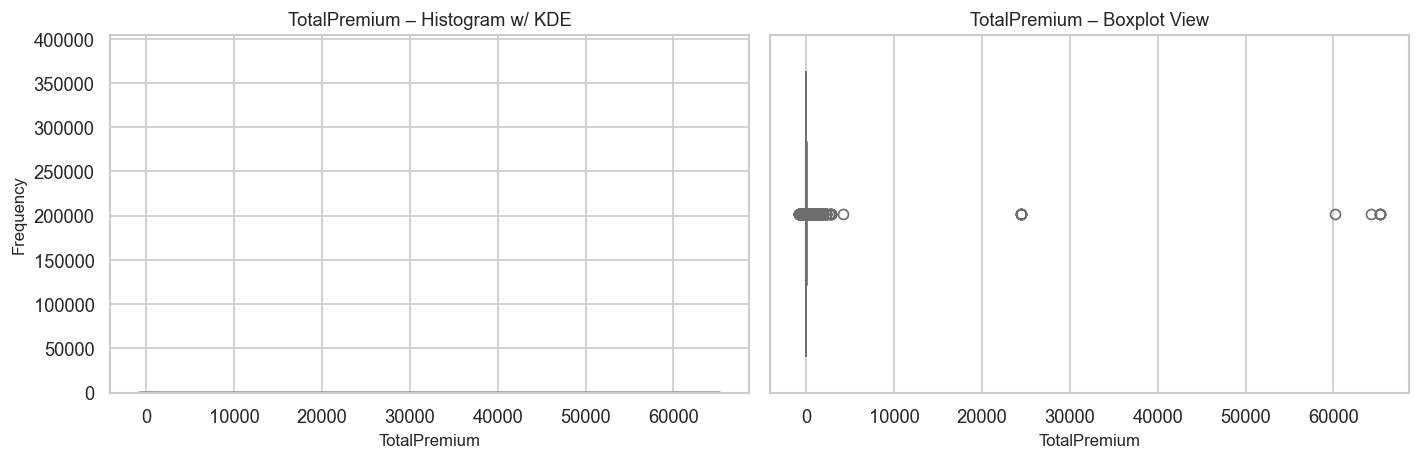

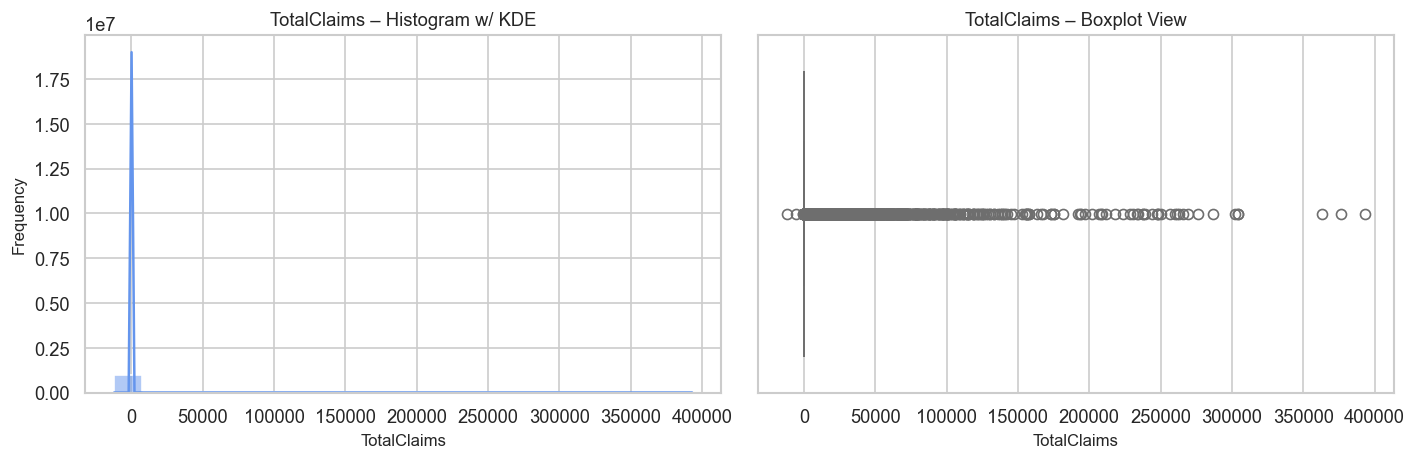

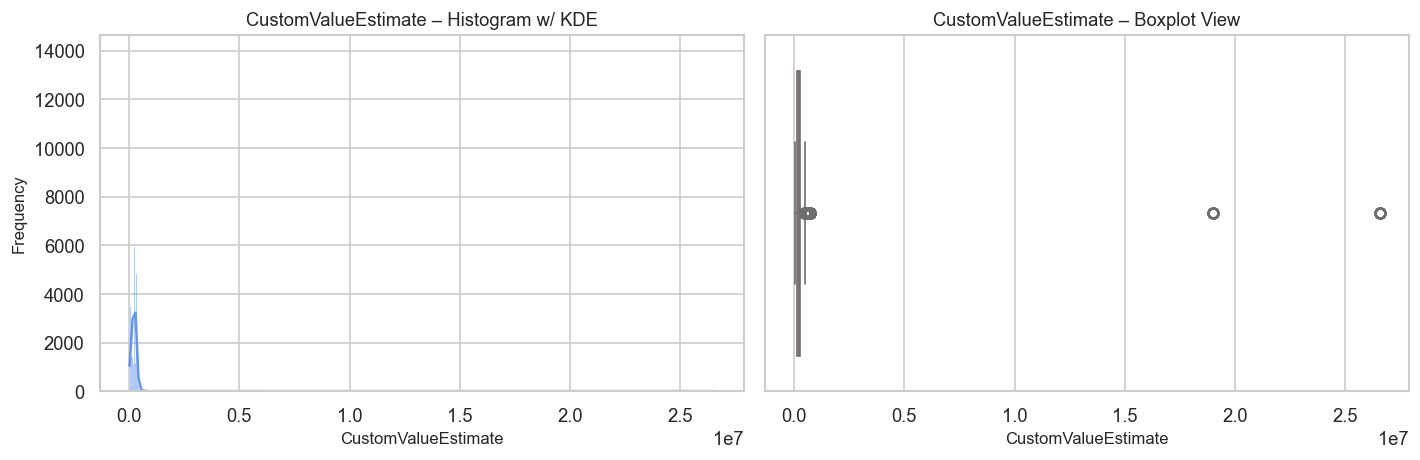

In [54]:
# ------------------------------------------------------------------------------
# 📊 Layer 2B – Histogram & Boxplot Distributions (Refactored)
# ------------------------------------------------------------------------------

# ✅ Import the class from your refactored module
from src.eda.numeric_plotter import NumericPlotter  # Ensure path is correct

# ✅ Define which variables you'd like to visualize (if they exist in df)
visual_cols = ["TotalPremium", "TotalClaims", "CustomValueEstimate"]

# ✅ Initialize the plotter
plotter = NumericPlotter(df)

# ✅ Plot all available visual columns defensively
plotter.plot_all(visual_cols)

## 📅 Layer 3 – Temporal Trend Analysis (Claims & Premium Over Time)

This step explores temporal patterns in the insurance dataset to understand how claim behavior and premium intake evolve month-over-month.

- Aggregates `TotalClaims` and `TotalPremium` by `TransactionMonth`
- Plots trends to detect seasonal effects, anomalies, or shifts in volume
- Enables early detection of time-related patterns in risk and revenue
- Flags unusual spikes or dips in claim frequency or intensity

This analysis helps contextualize loss ratios over time and supports time-aware segmentation or modeling.


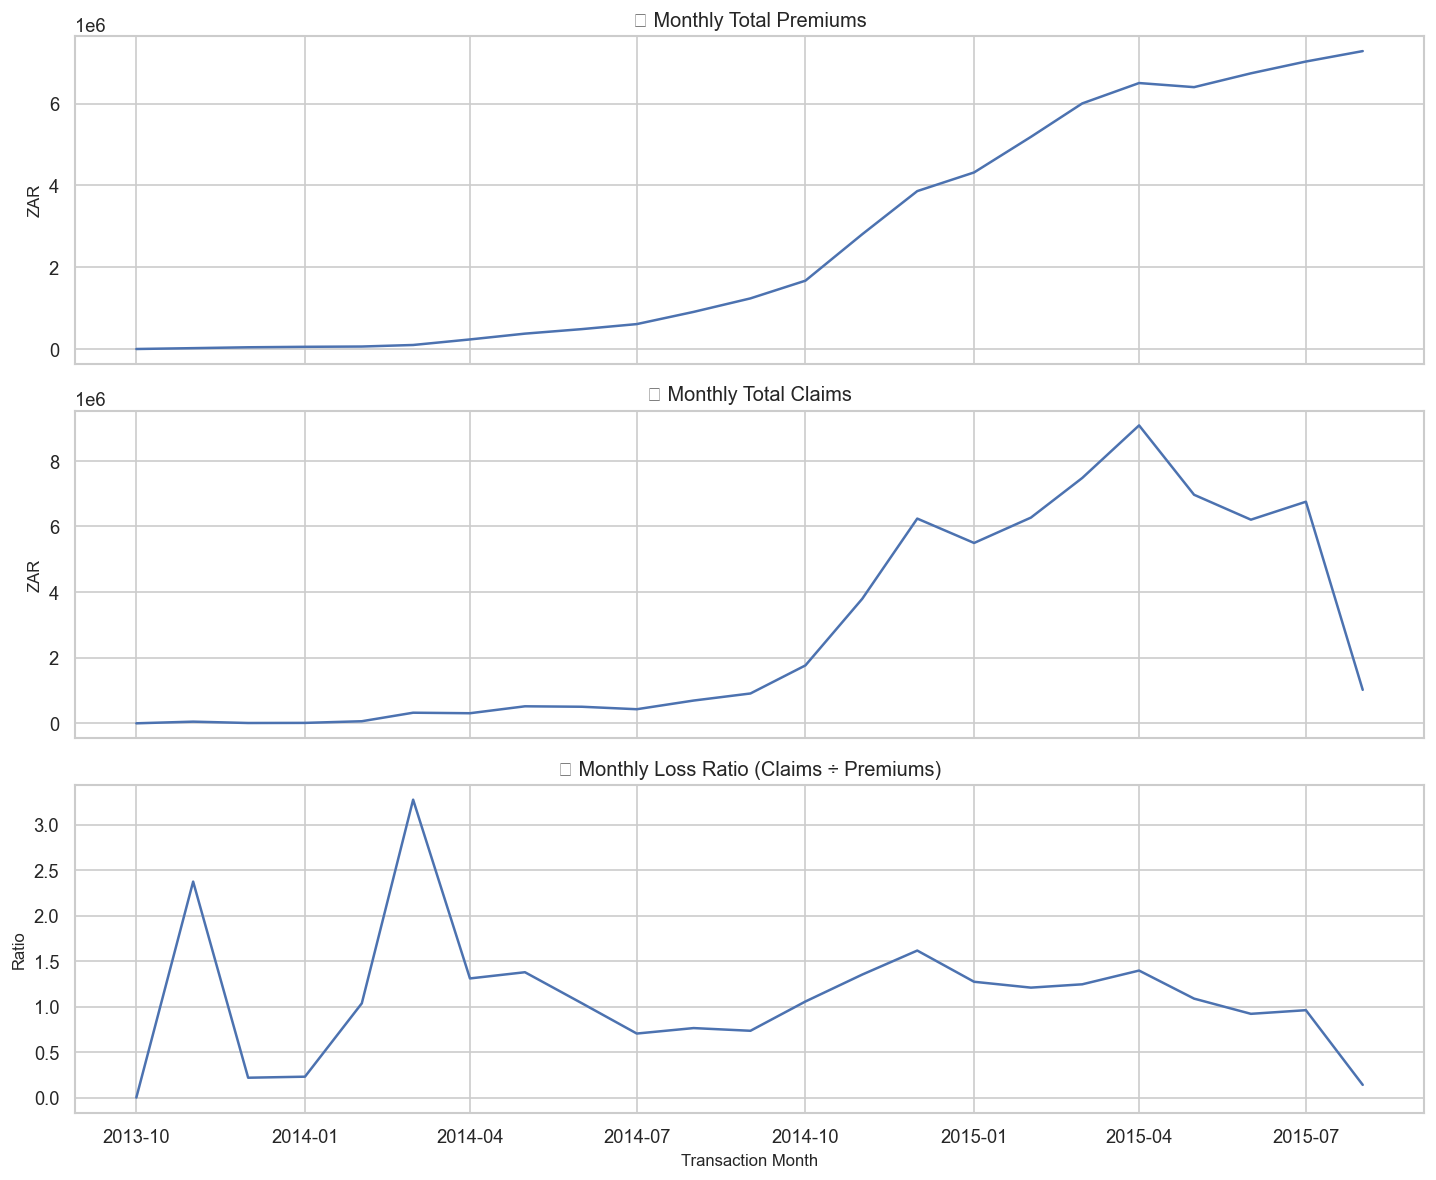

🧾 Missing or invalid 'TransactionMonth' entries: 0 rows (0.00%)


In [55]:
# ------------------------------------------------------------------------------
# 📅 Layer 3 – Temporal Trend Analysis of Claims and Premiums (Refactored)
# ------------------------------------------------------------------------------

# ✅ Import your class from the refactored module
from src.eda.temporal_analyzer import TemporalClaimsAnalyzer

# ✅ Step 1: Initialize analyzer with full DataFrame
time_analyzer = TemporalClaimsAnalyzer(df)

# ✅ Step 2: Parse and clean TransactionMonth
time_analyzer.prepare_temporal_data()

# ✅ Step 3: Aggregate monthly totals and loss ratio
time_analyzer.aggregate_monthly_metrics()

# ✅ Step 4: Plot temporal trends for premiums, claims, and loss ratio
time_analyzer.plot_trend_lines()

# ✅ Step 5: Report % of missing date values
time_analyzer.report_missing_months()

## 🚘 Layer 5 – Vehicle Risk Profiling (Make & Model Loss Ratios)

This step evaluates how different vehicle types (by `Make` and `Model`) contribute 
to insurance risk and premium fairness for AlphaCare.

🔍 Key Steps:
- Aggregates `TotalClaims` and `TotalPremium` by vehicle `Make` and `Model`
- Computes `LossRatio = TotalClaims / TotalPremium` for each grouping
- Flags vehicle categories with disproportionate insurance cost (high/low risk)
- Visualizes top 15 high-risk and low-risk vehicle segments using bar charts

🎯 Business Use Case:
Allows AlphaCare to calibrate premiums more fairly, design exclusion rules, or 
launch marketing campaigns targeting lower-risk makes and models.


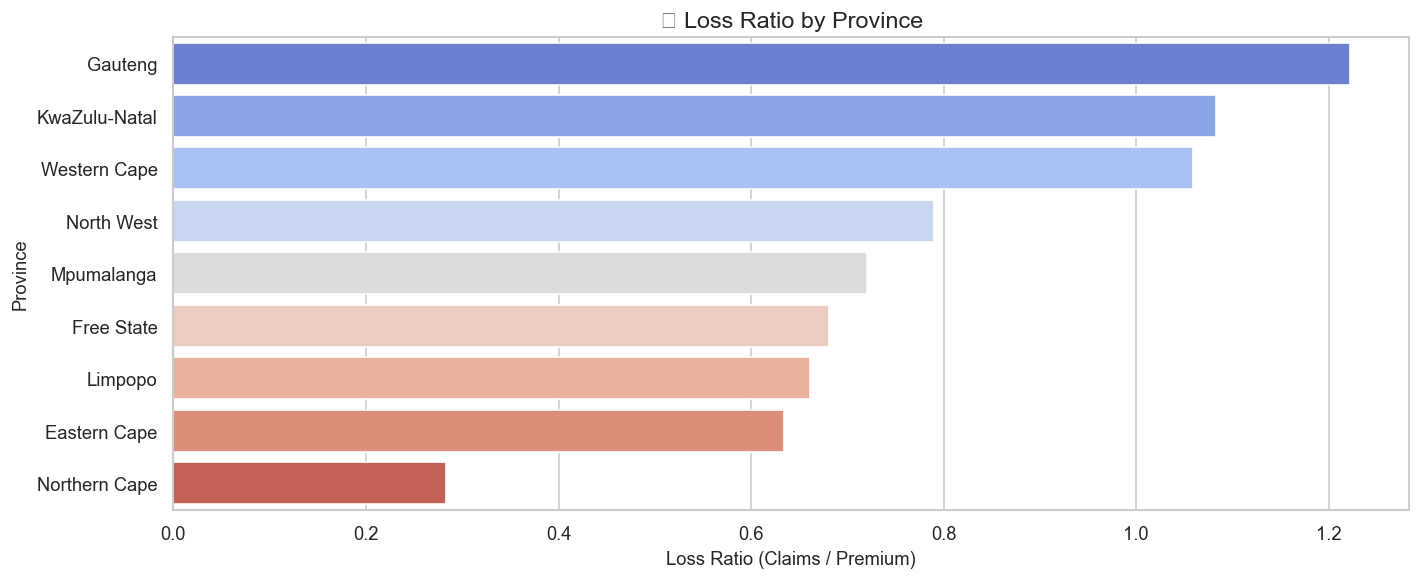

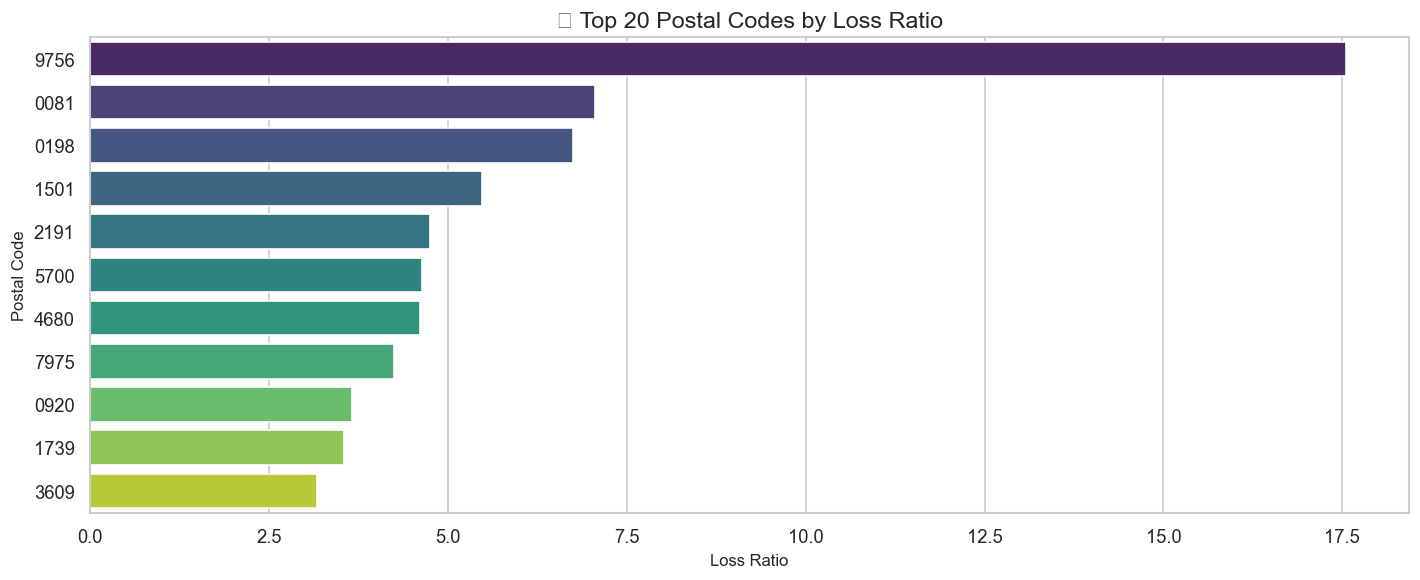

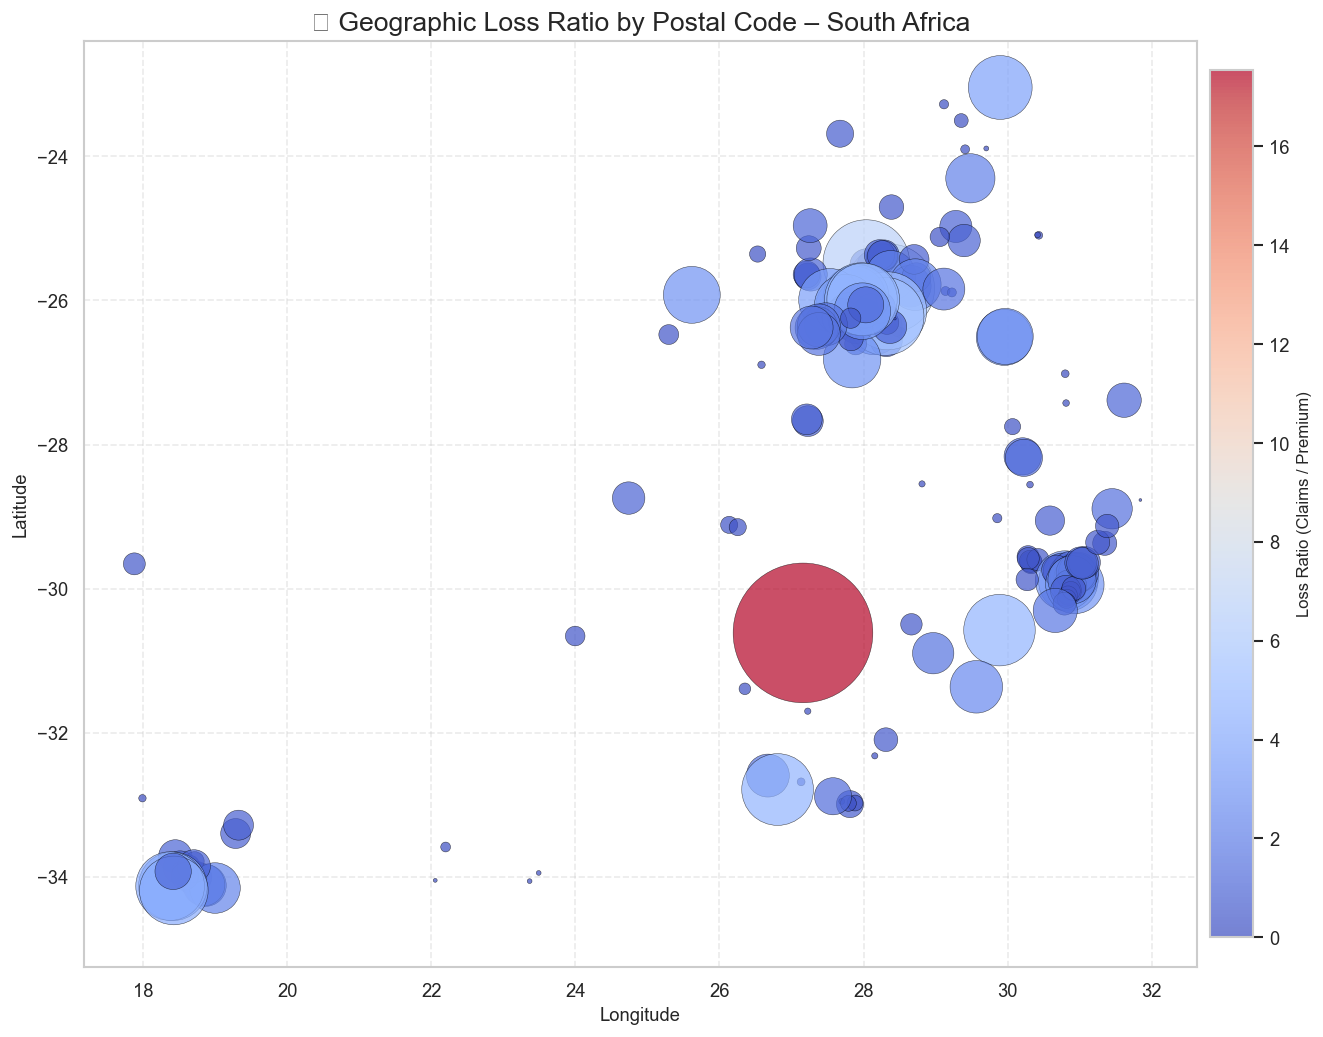

In [57]:
# ------------------------------------------------------------------------------
# 🌍 Layer 4 – Geographic Loss Ratio Visualization (Refactored, Defensive)
# ------------------------------------------------------------------------------

# ✅ Import GeoRiskVisualizer from refactored module
from src.eda.geo_risk_visualizer import GeoRiskVisualizer

# ✅ Define path to geolocation dataset (ensure it's correct)
coord_file_path = "data/raw/opendb-2025-06-17.csv"

try:
    # ✅ Step 1: Initialize the visualizer
    geo_viz = GeoRiskVisualizer(df, coord_path=coord_file_path)

    # ✅ Step 2: Compute province and postal-level loss ratios
    geo_viz.compute_loss_ratios()

    # ✅ Step 3: Merge with latitude/longitude (with defensive geographic filter)
    geo_viz.merge_coordinates()

    # ✅ Step 4: Plot Loss Ratio by Province
    try:
        geo_viz.plot_province_bar()
    except Exception as e:
        print(f"❌ Failed to generate province-level bar chart: {e}")

    # ✅ Step 5: Plot Top 20 Postal Codes by Loss Ratio
    try:
        geo_viz.plot_top_postal_codes(top_n=20)
    except Exception as e:
        print(f"❌ Failed to generate postal code bar chart: {e}")

    # ✅ Step 6: Plot Geographic Loss Ratio Bubble Map with export
    try:
        geo_viz.plot_loss_ratio_map(
            output_path="data/outputs/loss_ratio_map_with_overlay.png"
        )
    except Exception as e:
        print(f"❌ Failed to generate geographic bubble map: {e}")

except FileNotFoundError as fnf:
    print(f"❌ Geolocation file not found: {coord_file_path}")
except ValueError as ve:
    print(f"❌ Data validation error: {ve}")
except Exception as err:
    print(f"❌ Unexpected error during Layer 4 visualizations: {err}")

## 🚘 Layer 5 – Vehicle Risk Profiling (Make & Model Loss Ratios)

This step evaluates how different vehicle types (by `Make` and `Model`) contribute to insurance risk.

- Aggregates `TotalClaims` and `TotalPremium` by vehicle `Make` and `Model`
- Computes `LossRatio = TotalClaims / TotalPremium` for each
- Flags makes/models with disproportionately high or low risk
- Visualizes top performers and bottom performers using bar plots

This helps AlphaCare calibrate premiums by car type and design exclusion rules or marketing campaigns for safer vehicle categories.


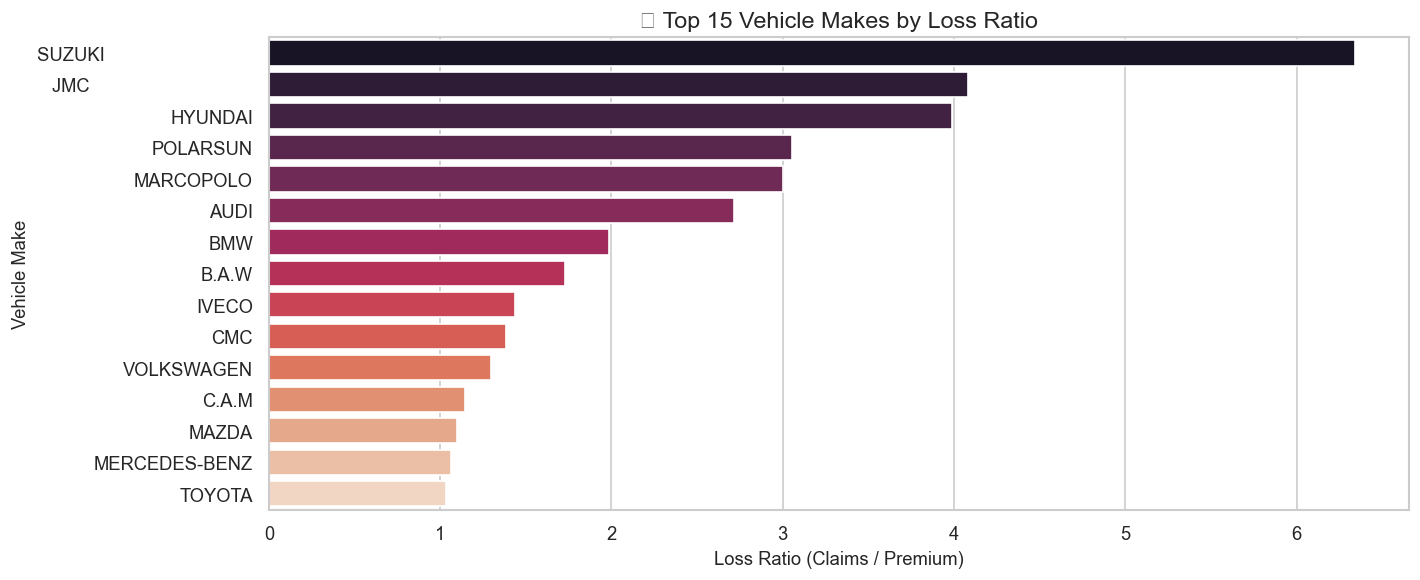

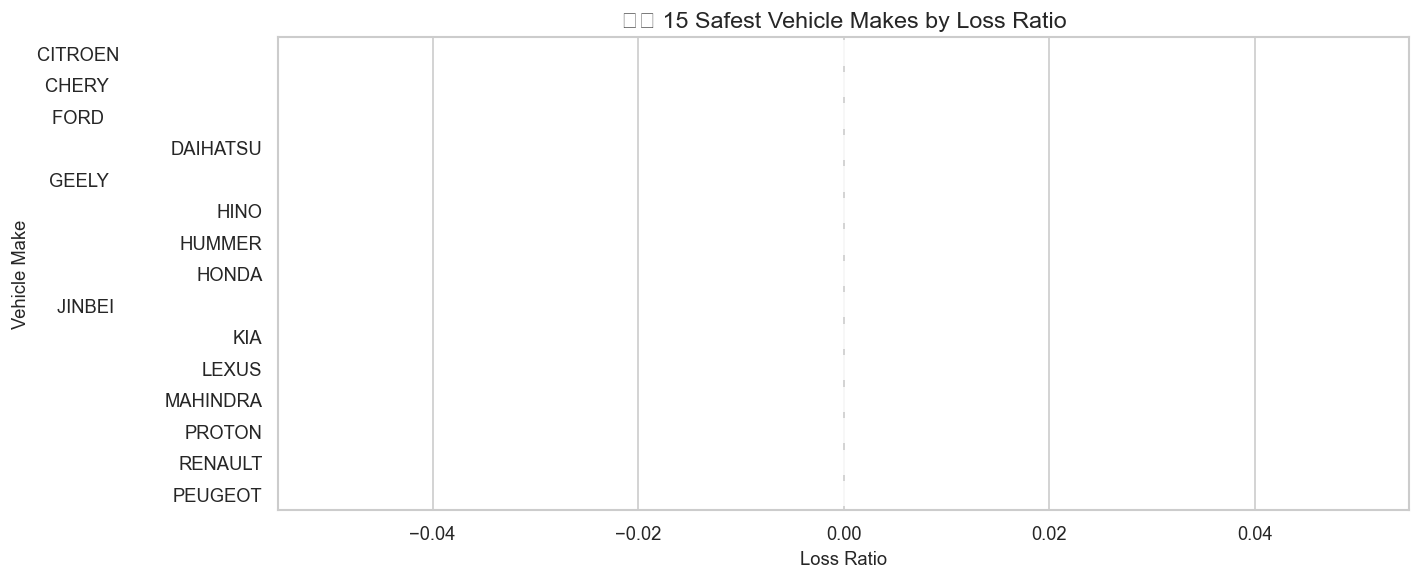

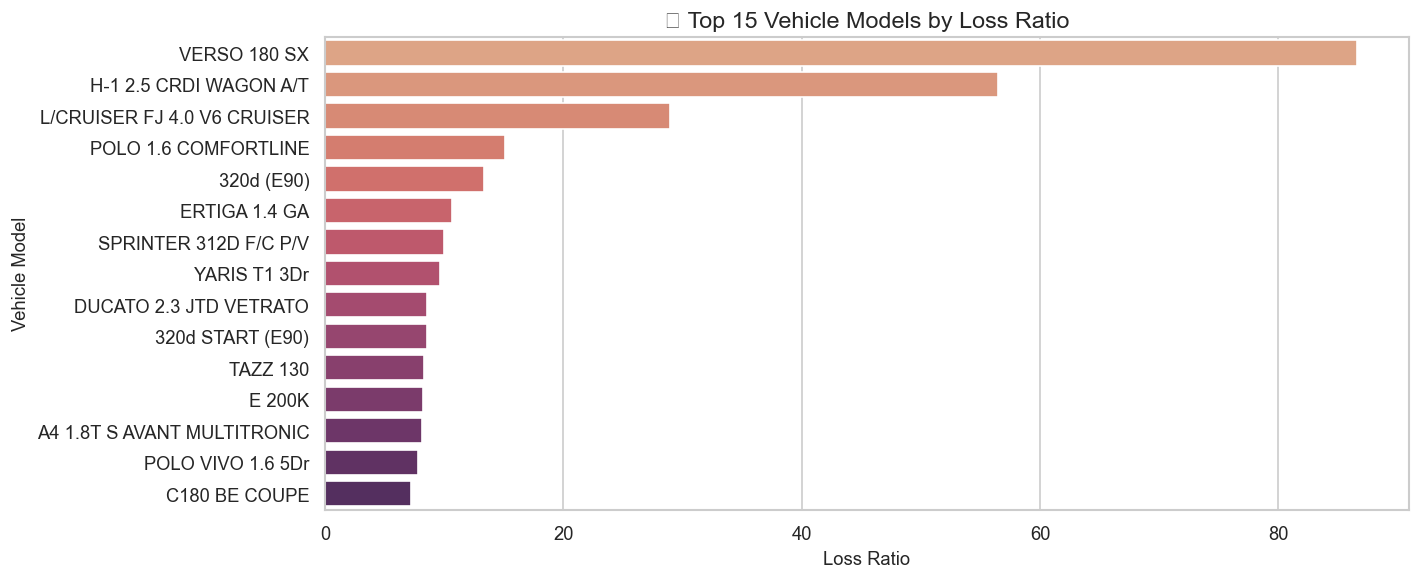

In [58]:
# ------------------------------------------------------------------------------
# 🚘 Layer 5 – Vehicle Loss Ratio Profiling (Make & Model)
# ------------------------------------------------------------------------------

from src.eda.vehicle_risk_profiler import VehicleRiskProfiler  # 🧠 OOP analyzer module

# ✅ Step 1: Initialize the profiler with insurance dataset
try:
    profiler = VehicleRiskProfiler(df)  # df is assumed preloaded and validated
except ValueError as ve:
    print(f"❌ Vehicle profiling initialization failed: {ve}")
else:
    # ✅ Step 2: Compute risk tables and visualize plots
    try:
        profiler.plot_vehicle_risk()
    except Exception as e:
        print(f"❌ Plotting failed during vehicle risk visualization: {e}")

## ⚖️ Layer 6 – Gender-Based Risk Variation

This step compares insurance risk metrics across gender groups (`Male`, `Female`, `Other`) to assess whether claim behavior or profitability varies meaningfully by gender.

- Computes total `TotalClaims`, `TotalPremium`, and `LossRatio` by `Gender`
- Visualizes loss ratios across groups via bar plot
- Uses boxplots to compare distributions of claim amount and premium
- Highlights any statistically visible differences for follow-up A/B testing

This is a core input to the hypothesis test on gender-based risk differences in Task 3.


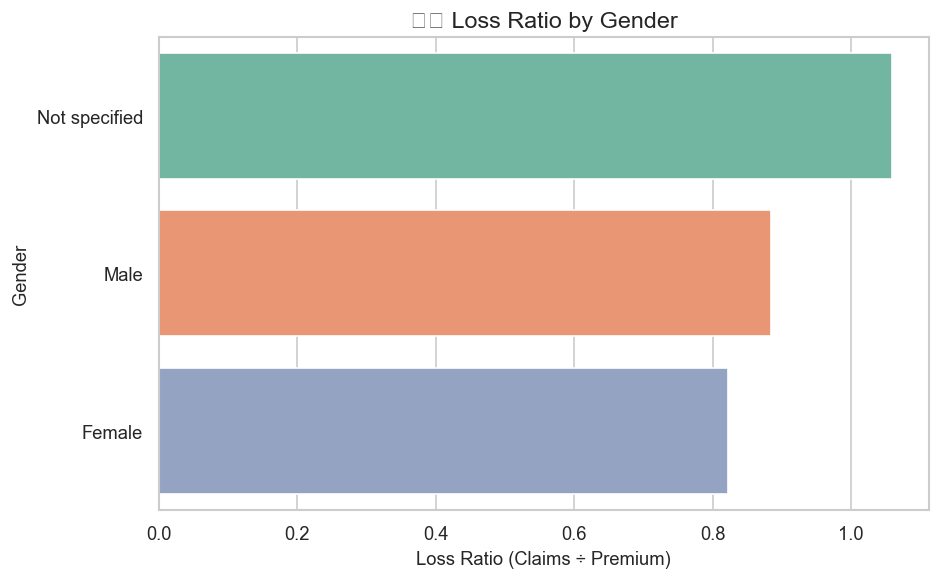

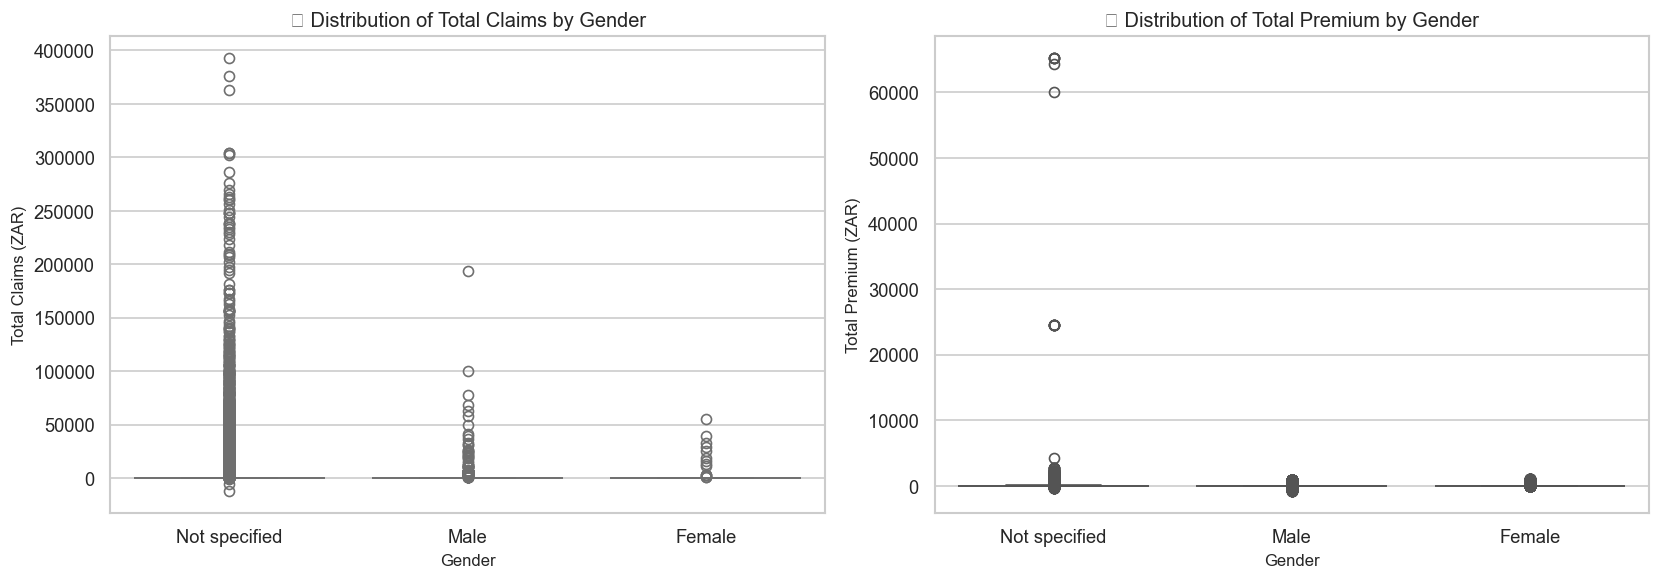

In [59]:
# ------------------------------------------------------------------------------
# ⚖️ Layer 6 – Risk Metrics by Gender Group (Modular Refactor)
# ------------------------------------------------------------------------------

# ✅ Step 1: Import and Initialize GenderRiskProfiler
from src.eda.gender_risk_profiler import (
    GenderRiskProfiler,
)  # Modular gender analysis class

# ✅ Step 2: Instantiate profiler with base DataFrame
gender_profiler = GenderRiskProfiler(
    df
)  # Will raise error if Gender columns are missing

# ✅ Step 3: Compute aggregate loss ratio metrics
gender_agg = gender_profiler.compute_loss_ratios()

# ✅ Step 4: Visualize loss ratios by gender (bar plot)
gender_profiler.plot_loss_ratio_bar(gender_agg)

# ✅ Step 5: Visualize distribution of claims and premiums (box plots)
gender_profiler.plot_distribution_boxplots()

## 🧩 Layer 7 – Segment-Based Risk Profiling (Cover Type, Frequency, and Category)

This step analyzes risk and profitability across policy-level features that define **product segments**, including:

- `CoverType`: The type of insurance (e.g., comprehensive, third-party)
- `CoverGroup`: Grouping for plan families
- `TermFrequency`: Frequency of premium payment (monthly, annual)

Each of these features affects pricing, customer behavior, and risk exposure.

- Computes aggregate `TotalClaims`, `TotalPremium`, and `LossRatio` per segment
- Visualizes segment-wise differences using bar plots
- Identifies underperforming plan types and pricing inefficiencies

These segment-based insights can be tied directly to premium redesign or new marketing segmentation strategies.



📂 Segmenting by: CoverType



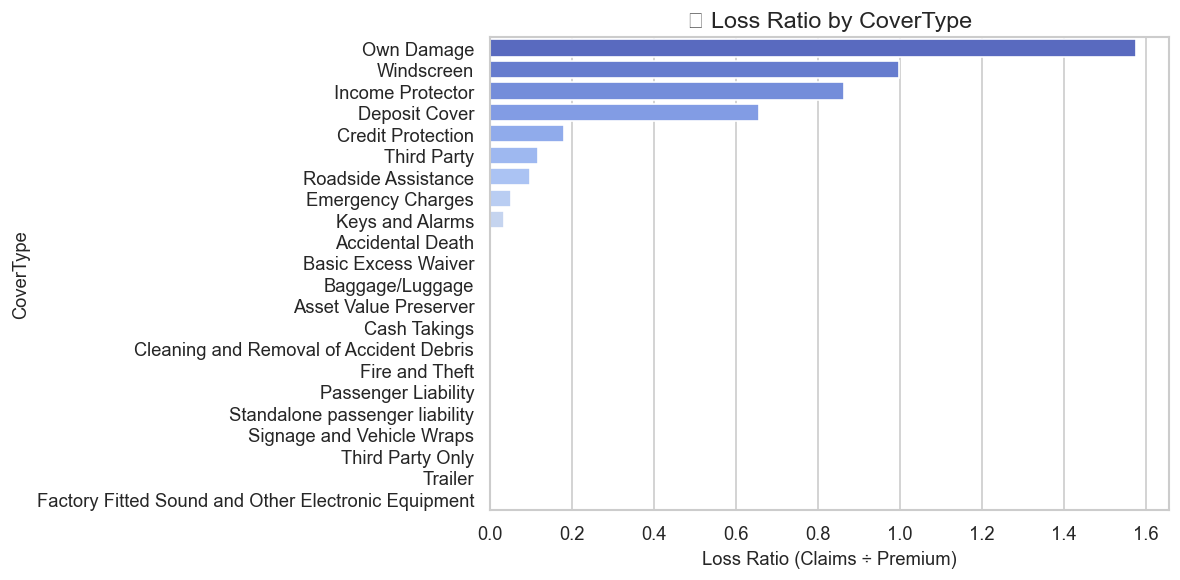


📂 Segmenting by: CoverGroup



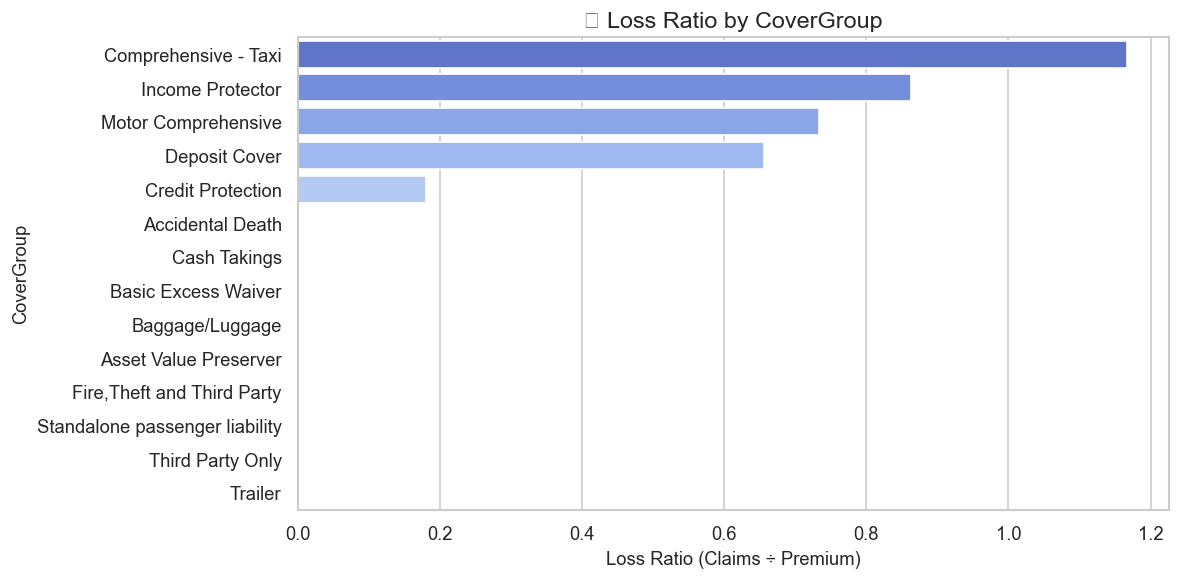


📂 Segmenting by: TermFrequency



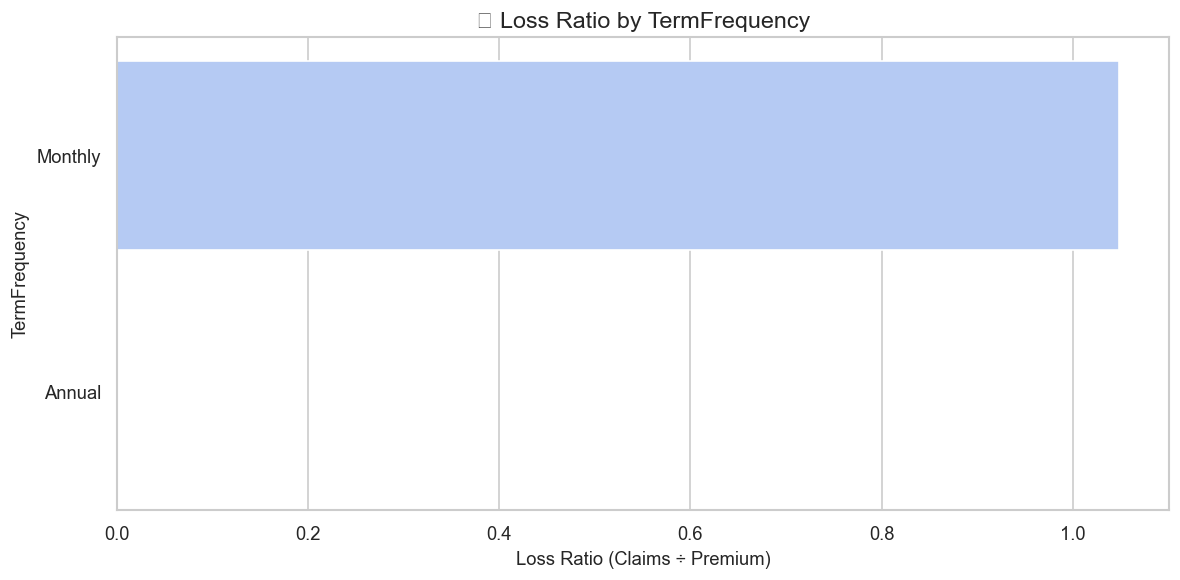

In [63]:
# ───────────────────────────────────────────────────────────────────────────────
# 🧩 Layer 7 – Risk Analysis by Plan Features (CoverType, CoverGroup, TermFrequency)
# ───────────────────────────────────────────────────────────────────────────────

# ✅ Import the risk profiler module (update import path if necessary)
from src.eda.plan_feature_risk_profiler import PlanFeatureRiskProfiler

# ✅ Step 1: Validate DataFrame structure
if not isinstance(df, pd.DataFrame):
    raise TypeError("❌ Input `df` must be a pandas DataFrame.")

if df.empty:
    raise ValueError("❌ DataFrame is empty. Cannot proceed with plan segmentation.")

# ✅ Step 2: Instantiate the profiler
try:
    plan_profiler = PlanFeatureRiskProfiler(df)
except Exception as e:
    raise RuntimeError(f"⚠️ Failed to initialize plan feature profiler: {e}")

# ✅ Step 3: Execute segmentation analysis and visualizations
try:
    plan_profiler.analyze()
except ValueError as ve:
    print(f"🚫 Analysis skipped: {ve}")
except Exception as e:
    raise RuntimeError(f"⚠️ Failed during plan segmentation analysis: {e}")

## 🧼 Layer 8 – Outlier Detection & Cleaning Diagnostics (IQR Method)

This step identifies extreme values in financial columns using the **IQR rule**, a robust, non-parametric approach:

- Flags values above Q3 + 1.5×IQR or below Q1 − 1.5×IQR
- Applies to key numerical features: `TotalClaims`, `TotalPremium`, `CustomValueEstimate`
- Counts outlier rows per variable
- Uses overlayed boxplots to visualize severity

Outliers may reflect legitimate rare claims or data entry issues. This layer helps inform whether winsorization, log scaling, or business rules are required downstream.


⚠️ TotalClaims: 2,793 outliers flagged (0.28%)


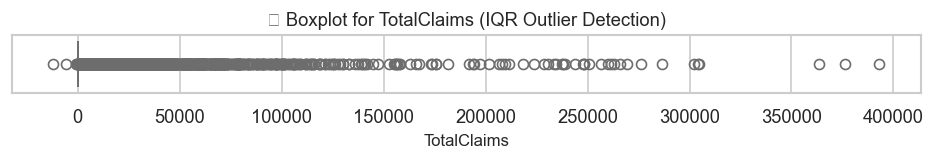

⚠️ TotalPremium: 209,042 outliers flagged (20.90%)


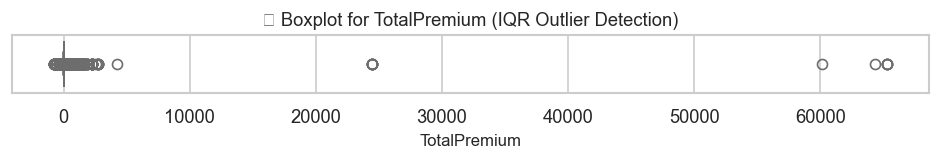

⚠️ CustomValueEstimate: 1,785 outliers flagged (0.18%)


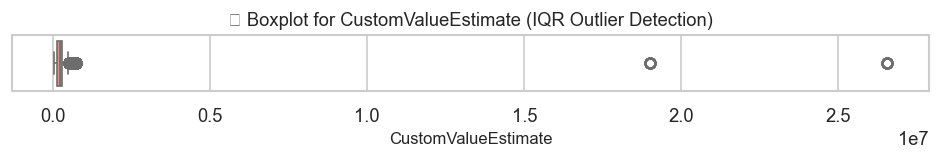

In [64]:
# ------------------------------------------------------------------------------
# 🧼 Layer 8 – Outlier Flagging with IQR Method (Modular Version)
# ------------------------------------------------------------------------------

# ✅ Step 1: Import and instantiate the IQR outlier detector
from src.eda.iqr_outlier_detector import (
    IQRBasedOutlierDetector,
)  # Update path if needed

# 🧪 Step 2: Initialize detector with current DataFrame
try:
    iqr_detector = IQRBasedOutlierDetector(df)
except (TypeError, ValueError) as e:
    raise RuntimeError(f"❌ Failed to initialize outlier detector: {e}")

# 🔍 Step 3: Apply IQR detection and visualize flagged outliers
iqr_detector.detect_outliers()

# 📦 Step 4 (Optional): Store outlier masks for further filtering or tagging
iqr_outlier_flags = iqr_detector.get_outlier_flags()

## 🧠 Layer 9 – Schema Defensive Audit (Gap Watchdog 🛡️)

This layer surfaces hidden risks that basic `.info()` and `.isna()` checks miss.

- 🚨 Ensures column types match expectations (e.g., `TotalClaims` is numeric)
- ⚠️ Checks uniqueness for keys like `PolicyID` or `UnderwrittenCoverID`
- 🧼 Flags constant-value columns (uninformative for modeling)
- 🕳️ Detects high-cardinality columns that may cause overfitting or memory issues
- 💀 Audits critical nulls in priority fields (`TotalClaims`, `TotalPremium`, etc.)
- 🧪 Surfaces dtype anomalies (e.g., `PostalCode` as float)

This layer prevents schema drift, modeling issues, and silent logic bugs.


In [65]:
# ------------------------------------------------------------------------------
# 🧠 Layer 9 – Schema Defensive Audit (with Defensive Programming Enhancements)
# ------------------------------------------------------------------------------

# ✅ Import the schema auditor class from your module
from src.eda.defensive_schema_auditor import DefensiveSchemaAuditor  # Modular audit class

# 🧪 Step 1: Defensive check – Ensure df is a valid DataFrame before proceeding
if not isinstance(df, pd.DataFrame):
    raise TypeError("❌ `df` must be a pandas DataFrame for schema auditing.")

try:
    # 🧠 Step 2: Initialize the schema auditor with the provided dataset
    schema_auditor = DefensiveSchemaAuditor(df)  # Instantiate safely with internal copy

    # 🚀 Step 3: Run all schema validation and structural diagnostics
    schema_auditor.run_audit()  # Will print constant columns, nulls, mismatches, etc.

    # 📦 Step 4: Retrieve audit report dictionary for optional inspection or export
    schema_report = schema_auditor.get_report()  # Dictionary: keys = diagnostic layers

    # 🧷 Step 5: Defensive check – Ensure audit report is non-empty
    if not isinstance(schema_report, dict) or not schema_report:
        print("⚠️ Audit report is empty or malformed. Please review the schema auditor logic.")

except Exception as e:
    # ❌ Catch and print any unexpected errors in audit process
    print(f"🚨 Schema audit failed with error: {str(e)}")


🔍 Running full schema audit...

🧼 Constant-value columns (uninformative): ['Language', 'Country', 'ItemType', 'NumberOfVehiclesInFleet', 'StatutoryClass', 'StatutoryRiskType']
🕳️ High-cardinality columns (likely unscalable): ['PostalCode', 'Model', 'VehicleIntroDate', 'CapitalOutstanding']
⚠️ PolicyID is not unique: 7,000 unique values in 1,000,098 rows
⚠️ UnderwrittenCoverID is not unique: 116,532 unique values in 1,000,098 rows

💀 Null Audit for Critical Columns:
   • TotalClaims: 0 nulls (0.00%)
   • TotalPremium: 0 nulls (0.00%)
   • Gender: 9,536 nulls (0.95%)
   • TransactionMonth: 0 nulls (0.00%)

🚨 Type Mismatch Warnings:
   • PolicyID: ❌ Type mismatch (expected: <class 'object'>, got: int64)
   • UnderwrittenCoverID: ❌ Type mismatch (expected: <class 'object'>, got: int64)


## 🧰 Layer 10 – Schema Production Guardrails (Fix Recommendations)

This step takes action based on issues detected in Layer 9.

- Converts key fields to proper formats (e.g., `PostalCode` to string)
- Converts `TransactionMonth` to datetime with error catching
- Flags columns for exclusion based on cardinality or constancy
- Logs a fix plan for downstream modules (e.g., modeling filters, feature drops)

This layer enables automated downstream modeling without hard breaks or manual patching.


In [ ]:
# ------------------------------------------------------------------------------
# 🧰 Layer 10 – Schema Fixes & Guardrails
# ------------------------------------------------------------------------------

# 📦 Import the schema guardrail module
from src.eda.schema_guardrails import SchemaGuardrails

# 🧱 Defensive fallback if earlier lists don't exist
constant_cols = constant_cols if "constant_cols" in globals() else [] # Ensure constant_cols exists
high_cardinality = high_cardinality if "high_cardinality" in globals() else [] # Ensure high_cardinality exists

# 🔧 Initialize the guardrail processor
guardrails = SchemaGuardrails(
    df=df, constant_cols=constant_cols, high_cardinality=high_cardinality # Ensure these lists are defined
)

# 🛠️ Apply coercions and get exclusions
df = guardrails.apply_guardrails() # This will apply all necessary schema fixes and return the cleaned DataFrame

# 📤 Export exclusions to variable
excluded_cols = guardrails.get_excluded_columns() # This will return a list of columns that were excluded due to high cardinality or constant values

🔍 'PostalCode' already correctly typed as string.
🔍 'TransactionMonth' already correctly typed as datetime.

🚫 Columns recommended for exclusion from modeling:
   • Language
   • Country
   • ItemType
   • NumberOfVehiclesInFleet
   • StatutoryClass
   • StatutoryRiskType
   • PostalCode
   • Model
   • VehicleIntroDate
   • CapitalOutstanding

🧾 Final schema summary by data type:
object            36
float64           11
int64              3
bool               1
datetime64[ns]     1
Name: count, dtype: int64
